In [1]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.animation as animation
import os

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
results = earthaccess.search_datasets(instrument="oci")

In [4]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC_NRT
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3M_AVW_NRT
PACE_OCI_L3M_IOP_NRT
PACE_OCI_L3M_KD_NRT
PACE_OCI_L3M_PAR_NRT
PACE_OCI_L3M_POC_NRT
PACE_OCI_L3M_RRS_NRT


In [5]:
tspan = ("2024-07-14", "2024-08-10")
#bbox = (-58, 37.5, -52, 41) #howie
bbox = (-73, 35, -70, 37) #edward
# bbox=(-61, 34, -59, 39) #patrick
clouds = (0, 100)

In [6]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC_NRT",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)

In [7]:
paths = earthaccess.open(results) #'streaming' data

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
paths

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240414T165338.L2.OC_BGC.V2_0.NRT.nc>]

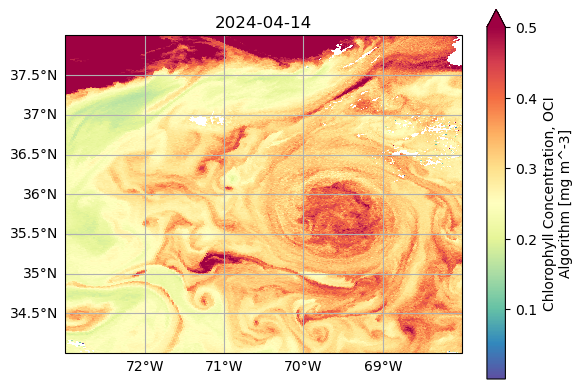

In [9]:
for index in range(0,len(paths)):
    datatree = open_datatree(paths[index])
    datatree
    dataset = xr.merge(datatree.to_dict().values())
    dataset
    dataset = dataset.set_coords(("longitude", "latitude"))
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
    plot = dataset["chlor_a"].plot(x="longitude", y="latitude", cmap="Spectral_r", vmax=0.5, ax=ax)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
    ax.set_ylim([34,38])
    ax.set_xlim([-73,-68])
    # ax.set_ylim([34,39]) #Patrick
    # ax.set_xlim([-62.5,-57.5]) #Patrick
    h=str(paths[index])
    datey=h[64:72]
    ax.set_title(datey[0:4]+'-'+datey[4:6]+'-'+datey[6:len(datey)])
    if len(str(index))==1:
        plt.savefig('edward_CHL'+str(0)+str(0)+str(index).split('.')[0]+'.png')
    elif len(str(index))==2:
        plt.savefig('edward_CHL'+str(0)+str(index).split('.')[0]+'.png')
    else:
        plt.savefig('edward_CHL'+str(index).split('.')[0]+'.png')

In [ ]:
# Get a list of all PNG files in the directory
image_dir = '/home/jovyan/tutorials/'
images = [img for img in os.listdir(image_dir) if img.endswith(".png")]
images.sort()  # Sort the images if needed
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Function to update the figure for each frame
def update(frame):
    img_path = os.path.join(image_dir, images[frame])
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(images), repeat=True)

# Save the animation as a GIF or display it
ani.save('animation_edward_all.gif', writer='imagemagick', fps=3)  # Save as GIF #was fps=2
# plt.show()  # Uncomment to display the animation

print("Animation created successfully.")

In [41]:
# image_dir = '/home/jovyan/tutorials/'
# images = [img for img in os.listdir(image_dir) if img.endswith(".png")]
# images

# for index in range(0,len(images)):
#     filename=images[index]
#     if len(images[index])==12:
#         newfilename=filename[0:6]+str(0)+filename[6:12]
#         os.rename(filename, newfilename)
#     elif len(images[index])==11:
#         newfilename=filename[0:6]+str(0)+str(0)+filename[6:12]
#         os.rename(filename, newfilename)

# Single Frame Chl 

In [26]:
# Set default fontsizes for plots
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [10]:
date_to_plot = "2024-04-14"
tspan = (date_to_plot, date_to_plot)
bbox = (-73, 35, -70, 37) #edward

In [16]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC_NRT",
    temporal=tspan,
    bounding_box=bbox)

In [17]:
datatree = open_datatree(paths[index])
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 70MB
Dimensions:           (number_of_bands: 286, number_of_reflective_bands: 286,
                       number_of_lines: 1710, pixels_per_line: 1272)
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/30)
    wavelength        (number_of_bands) float64 2kB ...
    vcal_gain         (number_of_reflective_bands) float32 1kB ...
    vcal_offset       (number_of_reflective_bands) float32 1kB ...
    F0                (number_of_reflective_bands) float32 1kB ...
    aw                (number_of_reflective_bands) float32 1kB ...
    bbw               (number_of_reflective_bands) float32 1kB ...
    ...                ...
    chlor_a_unc       (number_of_lines, pixels_per_line) float32 9MB ...
    carbon_phyto_unc  (number_of_lines, pixels_per_line) float32 9MB ...
    l2_flags          (number_of_lines, pixels_per_line) int32 9MB ...
    longitude         (number_of_lines, pixels_per_line) float32 9MB ...
    latitude          (number_of_lines, pixels_per_line) float32 9MB ...
    tilt              (number_of_lines) float32 7kB ...
Attributes: (12/45)
    title:                             OCI Level-2 Data BGC
    product_name:                      PACE_OCI.20240414T165338.L2.OC_BGC.V2_...
    processing_version:                2.0
    history:                           l2gen par=/data19/sdpsoper/vdc/vpu38/w...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -49.59148
    geospatial_lon_min:                -87.82571
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9936808943748474

/tmp/ipykernel_227/397965805.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plot=ax.pcolormesh(dataset["longitude"],dataset["latitude"],dataset["chlor_a"],cmap='Spectral_r',vmax=0.5)


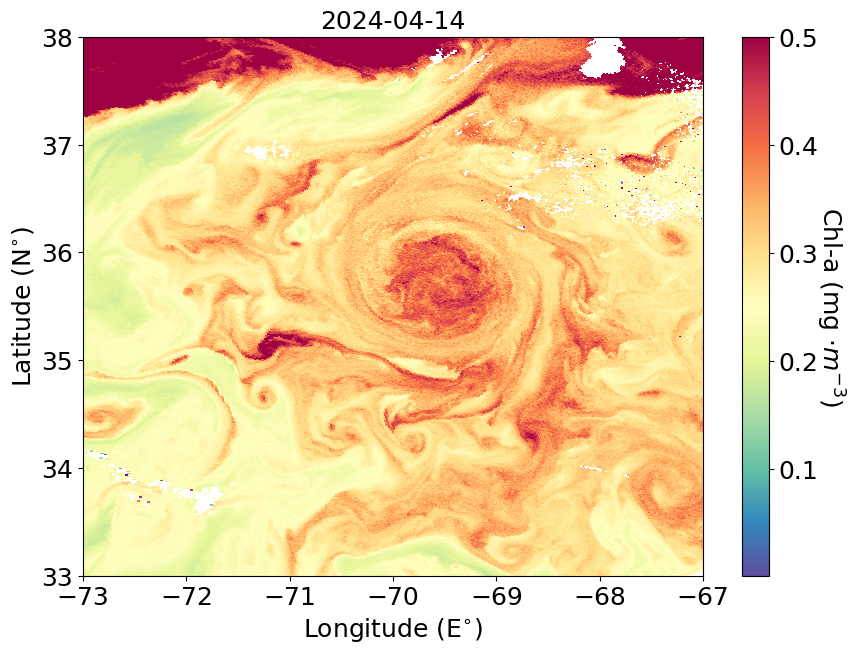

In [34]:
fig.clf()
fig,ax=plt.subplots(1,1,figsize=(10,7))

plot=ax.pcolormesh(dataset["longitude"],dataset["latitude"],dataset["chlor_a"],cmap='Spectral_r',vmax=0.5)
cbar = plt.colorbar(plot,ax=ax)
cbar.set_label('Chl-a (mg $ \cdot m^{-3}$)', rotation=270, labelpad=20)

ax.set_ylim([33,38])
ax.set_xlim([-73,-67])


ax.set_title(date_to_plot)
ax.set_ylabel('Latitude (N$^{\circ}$)')
ax.set_xlabel('Longitude (E$^{\circ}$)')

plt.savefig('Edward_chl_%s.png'%(date_to_plot),dpi=300)